In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [12]:
df = pd.read_csv("../data/train_data_with_genre.csv")
df.head(5)

,track_id,track_name,artist_id,artist_name,popularity,album_name,genre,artist_genres,duration_ms,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,time_signature
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,100,Die With A Smile,pop,"art pop,dance pop,pop",251667,False,...,-7.777,0,0.0304,0.30800,0.000000,0.1220,0.535,157.969,https://api.spotify.com/v1/audio-analysis/2plb...,3
1,5R8dQOPq8haW94K7mgERlO,Poker Face,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,76,The Fame,pop,"art pop,dance pop,pop",237200,False,...,-4.618,1,0.0787,0.11900,0.000002,0.1210,0.774,119.001,https://api.spotify.com/v1/audio-analysis/5R8d...,4
2,0SiywuOBRcynK0uKGWdCnn,Bad Romance,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,82,The Fame Monster (Deluxe Edition),pop,"art pop,dance pop,pop",294573,True,...,-3.752,1,0.0363,0.00314,0.000053,0.0842,0.714,119.007,https://api.spotify.com/v1/audio-analysis/0Siy...,4
3,2x7MyWybabEz6Y6wvHuwGE,Just Dance,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,74,The Fame,pop,"art pop,dance pop,pop",241933,False,...,-4.541,0,0.0311,0.02640,0.000043,0.1810,0.745,118.990,https://api.spotify.com/v1/audio-analysis/2x7M...,4
4,11BKm0j4eYoCPPpCONAVwA,Bloody Mary,1HY2Jd0NmPuamShAr6KMms,Lady Gaga,73,Born This Way (Special Edition),pop,"art pop,dance pop,pop",244760,False,...,-6.365,0,0.0291,0.01070,0.000002,0.1130,0.440,99.998,https://api.spotify.com/v1/audio-analysis/11BK...,4


### Shuffle the df

In [14]:
df = df.sample(frac=1)
df.head()

,track_id,track_name,artist_id,artist_name,popularity,album_name,genre,artist_genres,duration_ms,explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,time_signature
7769,5Jac5r26r1HkpH9Xv5zt7A,Duet (feat. Stephanie Briggs),65o6y7GtoXzchyiJB3r9Ur,Penny and Sparrow,39,Tenboom,acoustic,"acoustic pop,indie folk,indiecoustica,stomp an...",221786,False,...,-10.929,0,0.0327,0.7570,0.000085,0.1110,0.182,72.844,https://api.spotify.com/v1/audio-analysis/5Jac...,5
5860,2n7ohqg1s68ToAHh4u9mcW,Vete,4q3ewBCX7sLwd24euuV69X,Bad Bunny,68,YHLQMDLG,reggae,"reggaeton,trap latino,urbano latino",192024,True,...,-4.394,1,0.1880,0.0363,0.000009,0.1010,0.526,91.976,https://api.spotify.com/v1/audio-analysis/2n7o...,4
3553,11a52KICWhiO88I1tpj4CZ,"Christmas Oratorio, BWV 248, Pt. 2 ""For the Se...",5aIqB5nVVvmFsvSdExz408,Johann Sebastian Bach,5,J.S. Bach: Christmas Oratorio,classical,"baroque,classical,early music,german baroque",48040,False,...,-30.941,1,0.0407,0.9890,0.679000,0.1660,0.231,59.152,https://api.spotify.com/v1/audio-analysis/11a5...,3
2813,1XCBWtTJZuHbwa6GLUutjo,But Beautiful,0FMucZsEnCxs5pqBjHjIc8,Stan Getz,54,Stan Getz & Bill Evans,jazz,"bebop,bossa nova,cool jazz,jazz,jazz saxophone...",280840,False,...,-21.882,1,0.0396,0.9720,0.028700,0.0839,0.324,72.981,https://api.spotify.com/v1/audio-analysis/1XCB...,4
4696,2NkAoxQOr6MGdMB5JDTU81,Blueberry Hill - Remastered 2002,09C0xjtosNAIXP36wTnWxd,Fats Domino,47,Greatest Hits: Walking To New Orleans,blues,"louisiana blues,new orleans blues,piano blues,...",143440,False,...,-8.175,1,0.0272,0.8490,0.000027,0.2500,0.830,136.662,https://api.spotify.com/v1/audio-analysis/2NkA...,3


In [15]:
df.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'popularity',
       'album_name', 'genre', 'artist_genres', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'analysis_url', 'time_signature'],
      dtype='object')

### K-means clustering requires all variables to be continuous so....

In [23]:
X = df.drop(columns=['track_id', 'track_name', 'artist_id', 'artist_name', 'popularity',
       'album_name', 'genre', 'artist_genres', 'explicit', 'analysis_url', 'key', 'duration_ms', "mode", "time_signature"])
y = df["genre"]
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
7769,0.213,0.1850,-10.929,0.0327,0.7570,0.000085,0.1110,0.182,72.844
5860,0.886,0.6720,-4.394,0.1880,0.0363,0.000009,0.1010,0.526,91.976
3553,0.201,0.0646,-30.941,0.0407,0.9890,0.679000,0.1660,0.231,59.152
2813,0.499,0.0539,-21.882,0.0396,0.9720,0.028700,0.0839,0.324,72.981
4696,0.479,0.5060,-8.175,0.0272,0.8490,0.000027,0.2500,0.830,136.662
...,...,...,...,...,...,...,...,...,...
3063,0.850,0.6690,-5.460,0.0470,0.2600,0.274000,0.1030,0.914,112.966
4836,0.623,0.5960,-4.922,0.0407,0.5290,0.000000,0.1570,0.656,80.547
2620,0.796,0.5420,-6.751,0.3020,0.0853,0.000032,0.3600,0.855,93.668
6955,0.484,0.9400,-3.682,0.2570,0.0145,0.000323,0.2660,0.334,173.741


### Scaler 

In [27]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

### split train test and stratify with y

- No scaling

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

- Yes scaling

In [29]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, stratify=y)

### KNN Model

- No scaling

In [32]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [34]:
knn.score(X_test, y_test)

0.12017586712261846

- Yes scaling

In [37]:
knns = KNeighborsClassifier(n_neighbors=9)
knns.fit(Xs_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
knns.score(Xs_test, y_test)

0.4650708353688324

# => Accuracy KNeighbor classifer: 0.465

# Find best n and fit with scaled data (FOR FUN!)

In [ ]:
accs = []
for i in range(9, 50):
    knns_n = KNeighborsClassifier(n_neighbors=i)
    knns_n.fit(Xs_train, y_train)
    accs.append(knns_n.score(Xs_test, y_test))

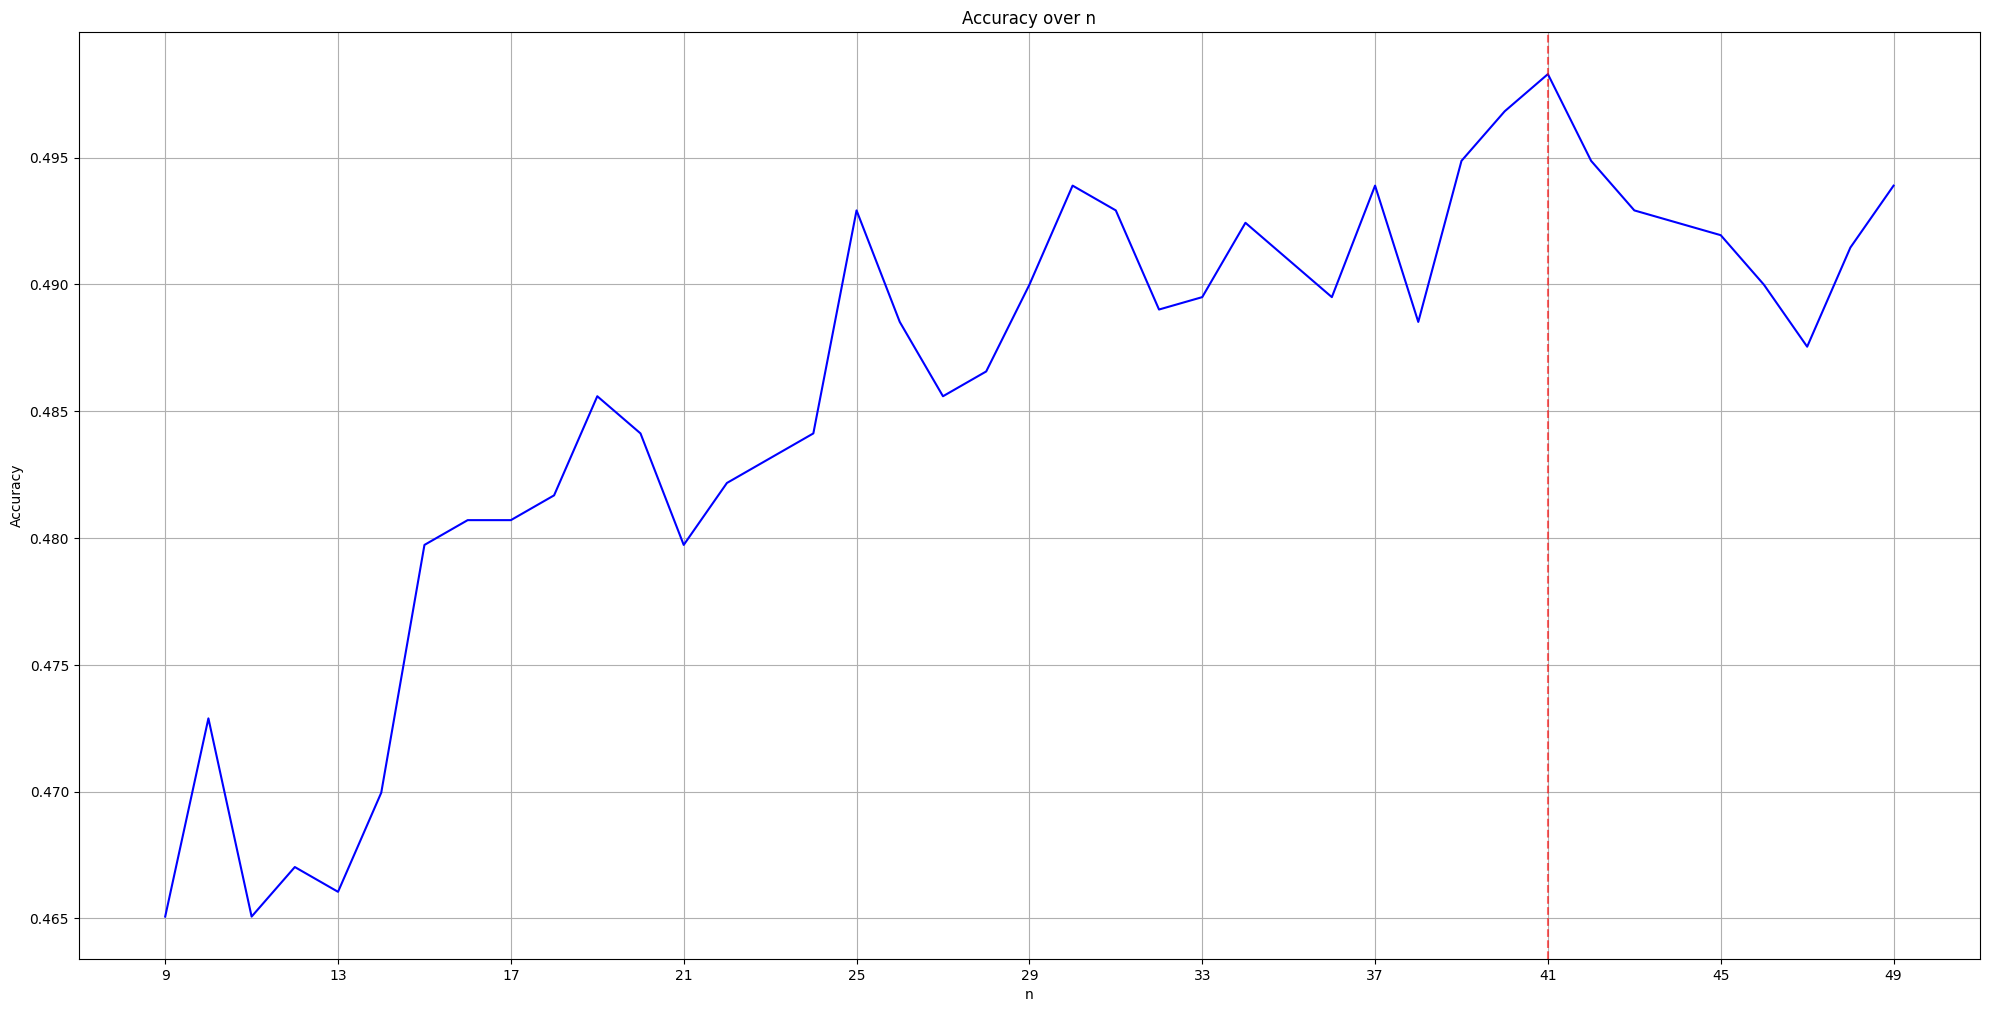

In [68]:
plt.figure(figsize=(20, 10))

plt.plot(range(9, 50), accs, c="blue")
plt.grid(True)
plt.xlabel("n")
plt.ylabel("Accuracy")
plt.xticks(range(9, 51, 4))
plt.axvline(np.argmax(accs) + 9, linestyle="--", c="red", alpha=0.6)
plt.tight_layout()
plt.title("Accuracy over n")
plt.show()

# plt.savefig('../result/accuracy_vs_nearestneighbors.jpg')